<a href="https://colab.research.google.com/github/tprole/ProduceTV/blob/main/ProduceTV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
from keras.models import load_model

from PIL import Image, ImageOps
import numpy as np
from matplotlib.pyplot import imshow
import cv2

# Load the model
model = load_model('keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

In [83]:
produceClasses = {
    0: 'apple',
    1: 'avocado',
    2: 'banana',
    3: 'kiwi',
    4: 'lemon',
    5: 'lime',
    6: 'mango',
    7: 'cantaloupe',
    8: 'galia melon',
    9: 'honeydew melon',
    10: 'watermelon',
    11: 'nectarine',
    12: 'orange',
    13: 'papaya',
    14: 'passion fruit',
    15: 'peach',
    16: 'pear',
    17: 'pineapple',
    18: 'plum',
    19: 'pomegranate',
    20: 'grapefruit',
    21: 'satsuma',
    22: 'asparagus',
    23: 'aubergine',
    24: 'mushroom',
    25: 'cabbage',
    26: 'carrot',
    27: 'cucumber',
    28: 'garlic',
    29: 'ginger',
    30: 'leek',
    31: 'onion',
    32: 'pepper',
    33: 'potato',
    34: 'sweet potato',
    35: 'beet',
    36: 'tomato',
    37: 'zucchini'
    }

In [84]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


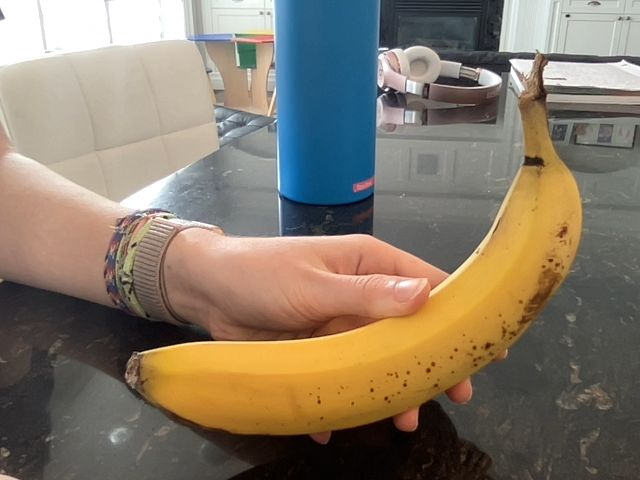

This is a banana!


In [86]:
import PIL
from keras.backend import argmax
# Replace this with the path to your image
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
image = PIL.Image.open(filename)
#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
# image = ImageOps.fit(image, size, Image.ANTIALIAS)
image = ImageOps.fit(image, size)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
classNum = int(argmax(prediction))
print("This is a {}!".format(produceClasses[classNum]))